# Clasificación con KNN

| Columna    | Tipo               | Descripción                                                                                                                                                       |
| ---------- | ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `clientid` | Numérico           | Identificador único del cliente. No tiene valor predictivo, solo sirve para identificar registros.                                                                |
| `income`   | Numérico           | Ingreso anual del cliente, probablemente en dólares u otra unidad monetaria.                                                                                      |
| `age`      | Numérico           | Edad del cliente en años (puede tener decimales si está interpolada).                                                                                             |
| `loan`     | Numérico           | Monto total del préstamo que se le ha otorgado o solicitado.                                                                                                      |
| `LTI`      | Numérico           | Loan-To-Income ratio: proporción entre el préstamo (`loan`) y los ingresos (`income`), calculada como `loan / income`. Es una métrica común de riesgo financiero. |
| `default`  | Categórica (0 o 1) | Variable objetivo. Indica si el cliente **incurrió en impago (1)** o **no lo hizo (0)**.                                                                          |


Dependencias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


1. Cargar datos

In [ ]:
# Cargar datos
df = pd.read_csv('../../datasets/credit/credit_data.csv', header=0)

2. Análisis exploratorio

In [3]:
print("Primeras filas:")
print(df.head())

Primeras filas:
   clientid        income        age         loan       LTI  default
0         1  66155.925095  59.017015  8106.532131  0.122537        0
1         2  34415.153966  48.117153  6564.745018  0.190752        0
2         3  57317.170063  63.108049  8020.953296  0.139940        0
3         4  42709.534201  45.751972  6103.642260  0.142911        0
4         5  66952.688845  18.584336  8770.099235  0.130989        1


In [4]:
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.410625     0.147585   
max    2000.000000  69995.685578    63.971796  13766.051239     0.199938   

           default  
count  2000.000000  
mean      0.141500  
std       0.348624  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [5]:
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64



Distribución variable objetivo:


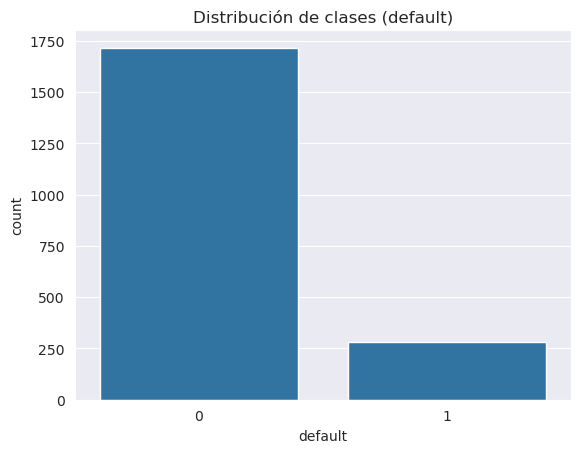

In [6]:
print("\nDistribución variable objetivo:")
sns.countplot(x='default', data=df)
plt.title("Distribución de clases (default)")
plt.show()

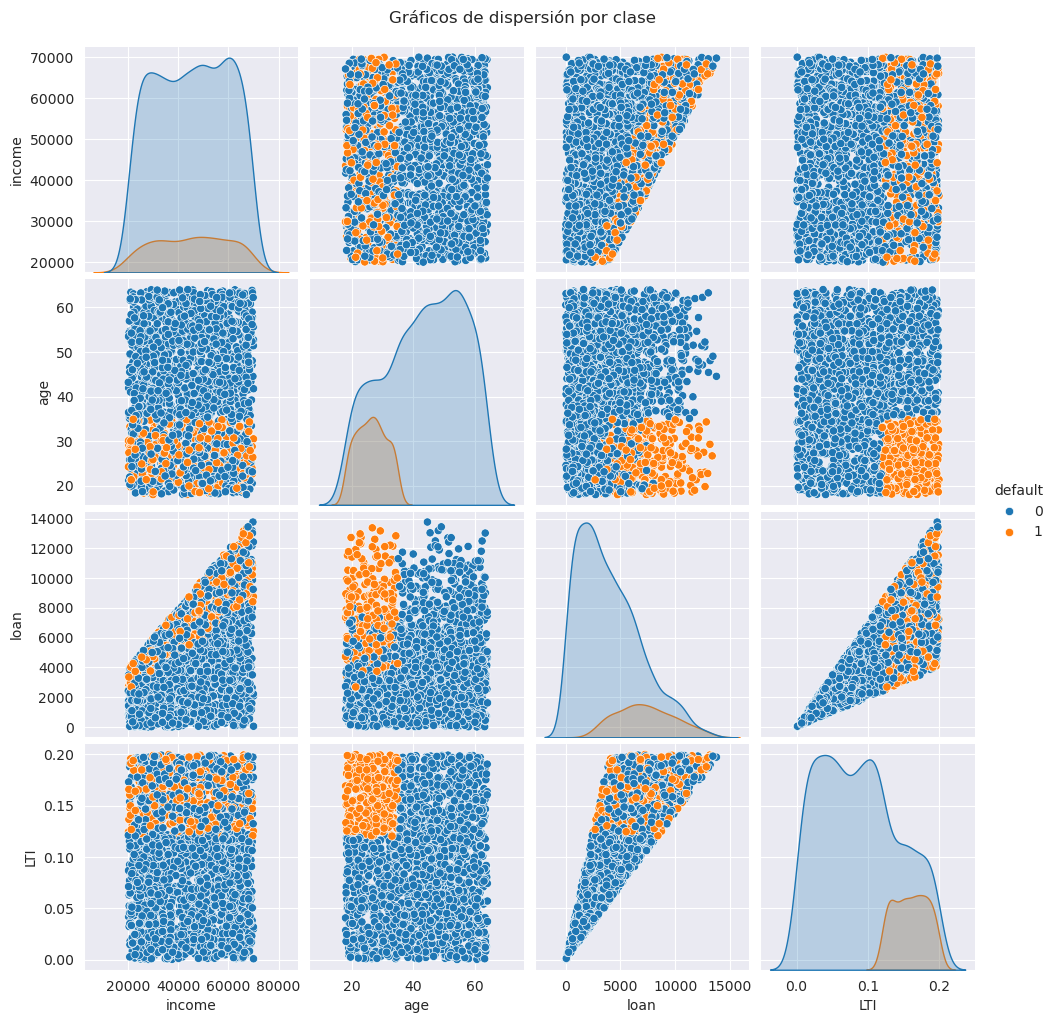

In [7]:
sns.pairplot(df[['income', 'age', 'loan', 'LTI', 'default']], hue='default')
plt.suptitle("Gráficos de dispersión por clase", y=1.02)
plt.show()

3. Limpieza y tratamiento de nulos

Eliminamos columnas no útiles si hay

In [8]:
if 'clientid' in df.columns:
    df = df.drop(columns=['clientid'])

Imputación de nulos (si existen)

In [9]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

 4. Transformación / Codificación

Separar variables predictoras y objetivo

In [10]:
X = df_imputed.drop(columns='default')
y = df_imputed['default']

Escalado de variables

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Separación del conjunto de datos

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

5. Entrenamiento y validación del modelo

Modelo

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluación

In [15]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       515
         1.0       0.96      0.91      0.93        85

    accuracy                           0.98       600
   macro avg       0.97      0.95      0.96       600
weighted avg       0.98      0.98      0.98       600



In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[512   3]
 [  8  77]]


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9816666666666667
ROC AUC Score: 0.9981610508280981


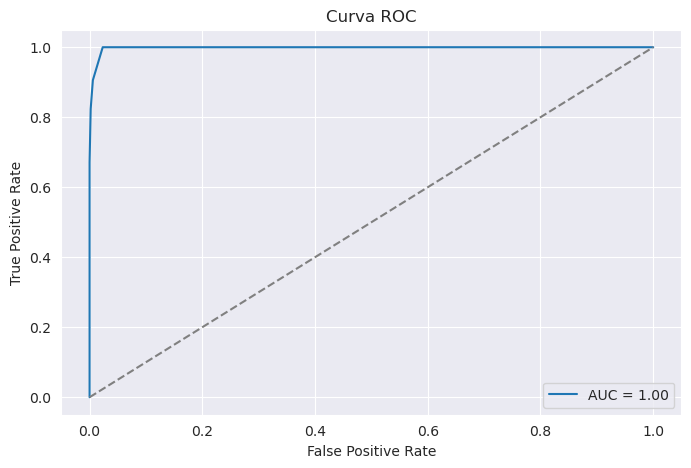

In [19]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()